In [2]:
include("../retrieval.jl")

simulate_retrieval (generic function with 1 method)

# Critical Noise

### Reconstruction probability
In order to compute the reconstruction probability, we proceed as follows:
- define a range of "perturb probability", for example `pp = range( 0.08, 0.58, length = 22 )`;
- then, for each $ p \in pp $:
    - generate a big number of indipendent samples $ \xi $ and initialize a counter;
        - select a random pattern from $ \xi $ perturb it with p and run the zero-temperatur Monte-Carlo;
        - if the final overlap with the original pattern is bigger or equal than 0.95, consider it as a success and update counter;
        - repeat for all the samples.
    - the reconstruction probability for $ p $ is just the fraction of successes.

reconstruction_probability(NN::AbstractVector,
    α;
    pp::AbstractVector = range( 0.08, 0.58, length = 22 ),
    nsweeps = 100,
    β = 10^3,
    nsamples = 5*10^2,
    earlystop = 0,
    thr = 0.95,
    show = false,
    save = true)

In [16]:
pp = range(0.05, 0.53, length = 22)
N = 600
α = 0.13
nsamples = 100
a, b, c, d = one_retrieval_frequency(N, α, nsamples, pp; β = 10^2, annealing = 0)

([0.95, 0.93, 0.94, 0.96, 0.88, 0.86, 0.83, 0.76, 0.53, 0.4  …  0.02, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.02190429135575904, 0.02564323999762429, 0.023868325657594162, 0.019694638556693216, 0.03265986323710906, 0.034873508801977725, 0.0377525168068637, 0.042923469599092816, 0.05016135580465919, 0.049236596391733084  …  0.014070529413628963, 0.014070529413628963, 0.009999999999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.9686333333333335, 0.9623999999999999, 0.9609333333333333, 0.9686, 0.9356666666666666, 0.9198000000000001, 0.8909333333333332, 0.8586333333333332, 0.7165333333333334, 0.6447666666666667  …  0.35156666666666664, 0.30073333333333335, 0.2613666666666667, 0.2141, 0.18290000000000003, 0.10396666666666667, 0.07869999999999999, 0.054099999999999995, -0.004866666666666667, -0.05933333333333333], [0.0010195958245021956, 0.0011084116703537685, 0.0010563907381715939, 0.0008250997967052275, 0.0014421154495035998, 0.0016480565025781837, 0.0018431727391518174, 0.00221

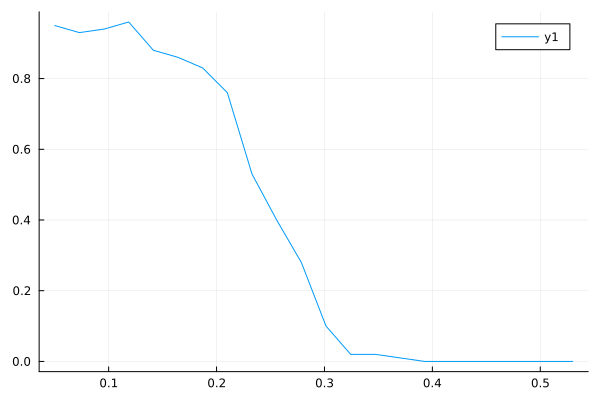

In [17]:
plot(pp, a)

------------------α = 0.14------------------
N = 100 ---> Done!


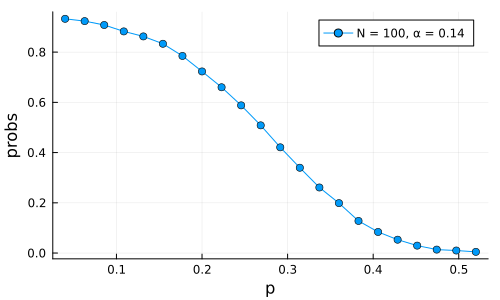

 84.837266 seconds (6.54 M allocations: 44.746 GiB, 7.62% gc time)


In [5]:
dd = [(0.14, range(0.04, 0.52, length = 22))]
NN = [(100, 10000)]
@time simulate_retrieval(NN, dd; save = false, show = true, β = 10^2, annealing = 0)

In [10]:
pp = readdlm("julia_data/old/probsN1000.txt")[:,1]
p100 = readdlm("julia_data/old/probsN1000.txt")[:,2]
e100 = readdlm("julia_data/old/probsN1000.txt")[:,3]


22-element Vector{Float64}:
 0.002954270937418768
 0.0030160844942686304
 0.0031624153881343146
 0.003426994810229939
 0.0037245793385461564
 0.004143345958470418
 0.004640192252311733
 0.004949580773659878
 0.004890462929290669
 0.0043199007111524475
 0.0031855452861130366
 0.0018020623582091393
 0.0008570866115778353
 0.00038702710369934015
 0.0001414142842854992
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

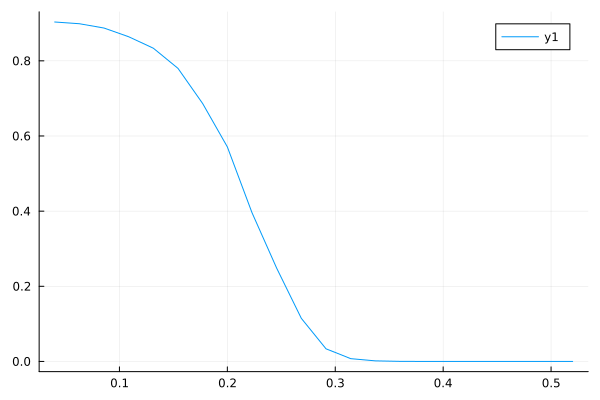

In [11]:
plot(pp, p100)

In [ ]:
dd = [(0.14, range(0.03, 0.51, length = 22)), (0.13, range(0.05, 0.53, length = 22)), (0.12, range(0.06, 0.54, length = 22)),
    (0.11, range(0.1, 0.54, length = 22)), (0.1, range(0.12, 0.56, length = 22)), (0.09, range(0.12, 0.56, length = 22)),
    (0.08, range(0.13, 0.57, length = 22)), (0.07, range(0.16, 0.6, length = 22)), (0.06, range(0.18, 0.61, length = 22))]

In [ ]:
dd = [(0.13, range(0.02, 0.42, length = 22)),
      (0.12, range(0.04, 0.44, length = 22)),
      (0.11, range(0.06, 0.48, length = 22)),
      (0.10, range(0.08, 0.50, length = 22)),
      (0.09, range(0.12, 0.56, length = 22)),
      (0.08, range(0.16, 0.60, length = 22))]

In [ ]:
dd = [(0.06, range(0.22, 0.64, length = 22)),
      (0.05, range(0.24, 0.66, length = 22)),
      (0.04, range(0.28, 0.68, length = 22)),
      (0.03, range(0.32, 0.72, length = 22)),
      (0.02, range(0.34, 0.74, length = 22))]


In [ ]:
NN = [(100, 10^5), (200, 10^5), (600, 2*10^4)]

In [9]:
t = 100
N = 2000
α = 0.4
M = round(Int, N*α)
overlaps = zeros(t)

for i in 1:t
    ξ = SH.generate_patterns(M, N)
    J = SH.store(ξ)
    k = rand(1:M)
    σ = ξ[:, k]
    σ_rec = SH.monte_carlo(σ, J; β = 1000, annealing = -1)
    m = SH.overlap(σ_rec, σ)
    overlaps[i] = m
    #println(m)
end

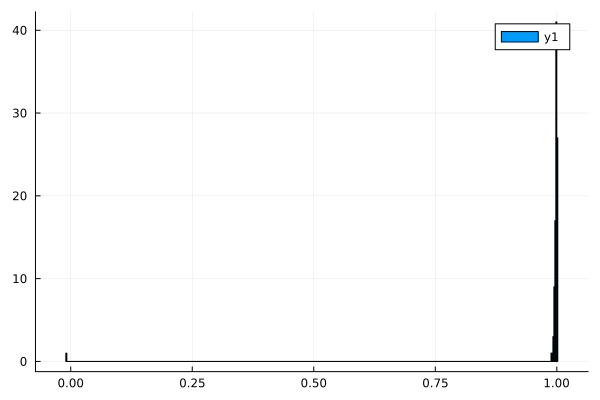

In [8]:
histogram(overlaps)

In [25]:
a = [1,2,3,4,5]
b = [2,1,6,3,2]

5-element Vector{Int64}:
 2
 1
 6
 3
 2

In [28]:
a .>= b .&& a .>= 3

5-element BitVector:
 0
 0
 0
 1
 1